# OSMOSIS 2019 

Topic: Movie Poster To Genre


In [1]:
import numpy as np
import pandas as pd
from scipy import misc
import matplotlib.pyplot as plt
import requests

movies = pd.read_csv("./MovieGenre.csv", encoding="ISO-8859-1")

#print(movies.columns)
#print(str(movies[movies["imdbId"] == int(img_id)]["Genre"].values[0]).split("|"))

length = len(movies)
print("Total Number Of Movies:" + str(length))


#try:
#    os.makedirs("/Movie_Posters")
#except OSError:
#    print("Creation of path failed")
#else:
#    print("Folder successfully created!")

#for i in range(0, length+1):
#   try:
#        img_data = requests.get(movies.loc[i]['Poster']).content
#    except:
#        print('No URL Provided')
#    else:
#        img_name = './Movie_Posters/' +str(movies.loc[i]['imdbId'])+'.jpg'
#        print(str(i)+" "+"Saving Image" + img_name)
#        with open(img_name, 'wb') as handler:
#            handler.write(img_data)

#print(movies.loc[1]['Title'])


Total Number Of Movies:40108


#### The First 10 records fetched using pandas with their corresponding posters.

In [2]:
for i in range(0, 10):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

0 imdbId                                                   114709
Imdb Link                    http://www.imdb.com/title/tt114709
Title                                          Toy Story (1995)
IMDB Score                                                  8.3
Genre                                Animation|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 0, dtype: object
0 Saving Image./Posters_Checkpoint1/114709.jpg

1 imdbId                                                   113497
Imdb Link                    http://www.imdb.com/title/tt113497
Title                                            Jumanji (1995)
IMDB Score                                                  6.9
Genre                                   Action|Adventure|Family
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 1, dtype: object
1 Saving Image./Posters_Checkpoint1/113497.jpg

2 imdbId                                                   113228
Imdb Link           

#### The Last 10 records fetched using pandas with their corresponding posters.

In [3]:
for i in range(length-10, length):
    print(str(i)+" "+str(movies.loc[i]))
    
    try:
        img_data = requests.get(movies.loc[i]['Poster']).content
    except:
        print('No URL Provided')
    else:
        img_name = './Posters_Checkpoint1/' +str(movies.loc[i]['imdbId'])+'.jpg'
        print(str(i)+" "+"Saving Image" + img_name+"\n")
        with open(img_name, 'wb') as handler:
            handler.write(img_data)

40098 imdbId                                                   229480
Imdb Link                    http://www.imdb.com/title/tt229480
Title                                    Island of Blood (1982)
IMDB Score                                                  4.7
Genre                                   Horror|Mystery|Thriller
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40098, dtype: object
40098 Saving Image./Posters_Checkpoint1/229480.jpg

40099 imdbId                                                    93991
Imdb Link                     http://www.imdb.com/title/tt93991
Title                   Slave Girls from Beyond Infinity (1987)
IMDB Score                                                  4.5
Genre                                   Action|Adventure|Comedy
Poster        https://images-na.ssl-images-amazon.com/images...
Name: 40099, dtype: object
40099 Saving Image./Posters_Checkpoint1/93991.jpg

40100 imdbId                                                   

#### Next We will Analyse the Data Distribution

In [2]:
genre_list = []
mov_mul_genre = []

for n in range(0, length):
    genres = str(movies.loc[n]['Genre'])
    if '|' in genres:
        mov_mul_genre.append(str(movies.loc[n]['Title']))
    genres_l = genres.split('|')
    genre_list.extend(genres_l)
    
unique_genres = list(set(genre_list))
    
print("Total Number of Unique Genres are: " + str(len(unique_genres)))

print("Total Number of Movies With Multiple Genres: " + str(len(mov_mul_genre)))

Total Number of Unique Genres are: 29
Total Number of Movies With Multiple Genres: 29365


#### Number of movies from each genre

Adult: 14
Musical: 845
Reality-TV: 2
Game-Show: 1
Family: 2100
Sci-Fi: 2020
nan: 145
Fantasy: 2012
Talk-Show: 7
Adventure: 3829
Crime: 5270
Romance: 6224
Music: 1292
Thriller: 4816
Mystery: 2395
History: 1426
Biography: 1999
Film-Noir: 403
Sport: 707
Western: 853
Documentary: 3882
Short: 1066
Action: 5331
War: 1173
Comedy: 12682
Animation: 1750
News: 83
Drama: 20053
Horror: 3990


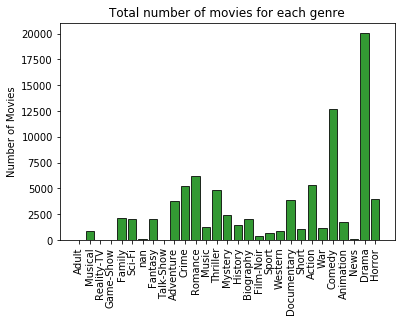

In [3]:
cnt_list = []

for gnr in unique_genres:
    cnt = genre_list.count(gnr)
    cnt_list.append(cnt)
    print(gnr + ": " + str(cnt))
    
#Creating a Bar Graph to represent the data

y_axis = np.arange(len(unique_genres))
plt.bar(y_axis, cnt_list, align='center', alpha=0.8, color='green', edgecolor='black')
plt.xticks(y_axis, unique_genres, rotation='vertical')
plt.ylabel('Number of Movies')
plt.title('Total number of movies for each genre')
plt.show()

## Processing and storing the data

In [4]:
import os
import glob
from sklearn.preprocessing import MultiLabelBinarizer
import cv2
import sys
import pickle

gen_accepted = ['Drama', 'Action', 'Comedy', 'Romance', 'Crime', 'Thriller', 'Horror', 'Documentary']
img_paths = glob.glob("./Movie_Posters/*.jpg")
img_ids = []
y = []
x = []
classes = tuple()

for path in img_paths:
    try:
        image = cv2.imread(path)
        (b, g, r)=cv2.split(image)
        image=cv2.merge([r,g,b])
        #for image ids
        start = path.rfind("/")+1
        end = len(path)-4
        #img_genres = tuple((movies[movies["imdbId"] == int(path[start:end])]["Genre"].values[0]).split("|"))
        img_gens = str(movies[movies["imdbId"] == int(path[start:end])]["Genre"].values[0]).split("|")
    except:
        #print("\r"+"Error in reading image!")
        sys.stdout.write("\r"+"Error in reading image!" + path)
        sys.stdout.flush()
    else:
        image = cv2.resize(image, (150, 150))
        image = image.astype(np.float32)
        
        ##For Y label
        img_genf = []
        for img_gen in img_gens:
            if img_gen in gen_accepted:
                img_genf.append(img_gen)
        if len(img_genf) !=0:
            x.append(image)
            img_genres = tuple(img_genf)
            y.append(img_genres)
            classes = classes + img_genres
        #img_ids.append(path[start:end])

x = np.asarray(x)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
classes = set(classes)
gen_classes = list(mlb.classes_)

#saving the dataset
pickle_dataset = open("X.pickle", "wb")
pickle.dump(x, pickle_dataset, protocol=4)
pickle_dataset.close()

pickle_dataset = open("y.pickle", "wb")
pickle.dump(y, pickle_dataset, protocol=4)
pickle_dataset.close()

pickle_dataset = open("gen.pickle", "wb")
pickle.dump(gen_classes, pickle_dataset, protocol=4)
pickle_dataset.close()


Error in reading image!./Movie_Posters/23911.jpggg

## Constructing the Layers 

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle

Name = "Movie_Poster_Pred4.model"

pickle_dataset = open("X.pickle", "rb")
X = pickle.load(pickle_dataset)

pickle_dataset = open("y.pickle", "rb")
y = pickle.load(pickle_dataset)

X = X/255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('sigmoid'))

#opt = tf.keras.optimizers.RMSprop(lr=0.001)

tensorboard = TensorBoard(log_dir="logs/{}".format(Name))

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, shuffle = True, callbacks=[tensorboard])

model.save(Name)

Train on 25088 samples, validate on 10753 samples
Epoch 1/10
25088/25088 [==============================] - 133s 5ms/step - loss: 0.4481 - acc: 0.8032 - val_loss: 0.4410 - val_acc: 0.8072
Epoch 2/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.4355 - acc: 0.8126 - val_loss: 0.4422 - val_acc: 0.8077
Epoch 3/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.4276 - acc: 0.8168 - val_loss: 0.4341 - val_acc: 0.8162
Epoch 4/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.4156 - acc: 0.8214 - val_loss: 0.4318 - val_acc: 0.8158
Epoch 5/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.3968 - acc: 0.8293 - val_loss: 0.4399 - val_acc: 0.8147
Epoch 6/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.3589 - acc: 0.8443 - val_loss: 0.4511 - val_acc: 0.8109
Epoch 7/10
25088/25088 [==============================] - 129s 5ms/step - loss: 0.3088 - acc: 0.8672 - val_loss: 0.4717 - 

In [10]:
print(gen_classes)


['Action', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Horror', 'Romance', 'Thriller']


## Prediction for a single picture

In [5]:
import tensorflow as tf

def test_img(filepath):
    IMG_SIZE = 150
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_array=np.expand_dims(new_array, axis=0)
    new_array = new_array.astype(np.float32)
    #new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    return new_array/255.0

model_p = tf.keras.models.load_model(Name)

prediction = model_p.predict([test_img('./Posters_Checkpoint1/114576.jpg')])

print(np.round(prediction, 2))

[[0.   0.01 0.   0.   1.   0.   0.83 0.  ]]


## Prediction for a set of pictures

In [15]:
import tensorflow as tf
import cv2
import glob
import csv
import pickle


pickle_dataset = open("gen.pickle", "rb")
class_gen = pickle.load(pickle_dataset)

Name = "Movie_Poster_Pred4.model"

def test_img2(filepath):
    global filepaths
    filepaths = glob.glob(filepath)
    IMG_SIZE = 150
    img = []
    for filepat in filepaths:
        img_array = cv2.imread(filepat)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        new_array = new_array.astype(np.float32)
        img.append(new_array)
    return np.asarray(img)/255.0

model_p = tf.keras.models.load_model(Name)

prediction = model_p.predict_proba([test_img2('./posters/*.jpg')])
pred = np.round(prediction, 2)
pred = pred.tolist()

with open('final_result.csv', mode = 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(['imdbID', 'Genre'])
    lst_gen = []
    strng_gen = ''
    for i in range(len(pred)):
        diction = dict(zip(class_gen, pred[i]))
        sorted_dict = sorted(diction.values(), reverse=True)
        sorted_dict = sorted_dict[:len(sorted_dict)-5]
        for j in range(len(sorted_dict)):
            sorted_dict[j] *= 100
            for genr, scr in diction.items():
                scr *= 100
                if int(sorted_dict[j]) == 0:
                    continue
                if sorted_dict[j] == sorted_dict[j-1]:
                    continue
                if scr == sorted_dict[j]:
                    strng_gen = strng_gen+str(genr)
                    if j == 2:
                        break
                    else:
                        strng_gen = strng_gen+ '|'
                    
        #getting the movie id
        strng_mov=filepaths[i]
        startl = strng_mov.rfind("/")+1
        endl = len(strng_mov)-4
        strng_mov = strng_mov[startl:endl]
        csv_writer.writerow([strng_mov, strng_gen])
        print(strng_mov + ":"+strng_gen)
        strng_gen = ''


12645:Drama|
21156:Drama|Comedy|Romance
17750:Comedy|Crime|Drama
21153:Romance|Comedy|Drama
11193:Comedy|Thriller|Horror
24625:Comedy|Thriller|Drama
12675:Drama|Comedy|Romance
13055:Comedy|Drama|Thriller
25028:Comedy|Romance|Action
23488:Drama|Action|Horror
5812:Drama|Crime|Documentary
22698:Drama|Action|Thriller
24991:Drama|Romance|Comedy
19130:Drama|Crime|Documentary
21040:Drama|Romance|
23937:Drama|Action|Crime|
6689:Comedy|Drama|
11841:Drama|Action|Romance
21576:Drama|Documentary|Horror
22485:Drama|Action|Crime|
13257:Documentary|Horror|Thriller
23327:Drama|Comedy|Crime
16884:Drama|Comedy|Documentary
2985:Drama|Thriller|Crime
4277:Comedy|Romance|Drama
20815:Action|Drama|Comedy
2795:Drama|Crime|Romance
22268:Drama|Comedy|Romance
24978:Drama|Comedy|Romance
9937:Drama|Romance|Comedy
19850:Action|Comedy|Drama
19993:Documentary|Drama|Comedy
5916:Drama|Action|Crime
15324:Comedy|Romance|Action
23659:Drama|Comedy|Romance
20701:Drama|Action|Thriller
24852:Drama|Action|Thriller|
11960:Drama|